In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns  
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data=pd.read_csv('C:\\Users\\Okwua\\train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(data.shape)
print('.................................................................................')
print(data.info())
print('.................................................................................')
print(data.dtypes)
print('.................................................................................')
print(data.isna().sum())

(891, 12)
.................................................................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
.................................................................................
PassengerId      int64
Survived         int64
Pclass           in

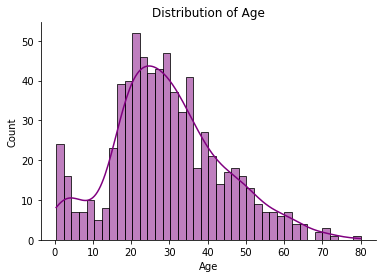

In [4]:
sns.histplot(x='Age', data=data, kde=True, bins=40, color='purple')
plt.title('Distribution of Age')
sns.despine();

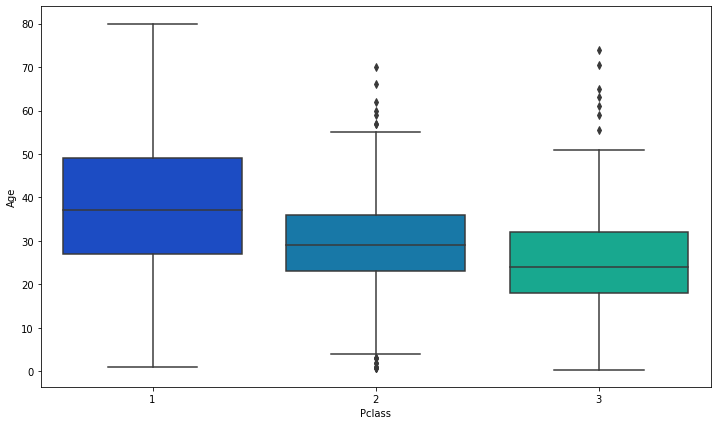

In [5]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter');

In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [7]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [8]:
data.drop(['Ticket','Name','PassengerId','Cabin'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


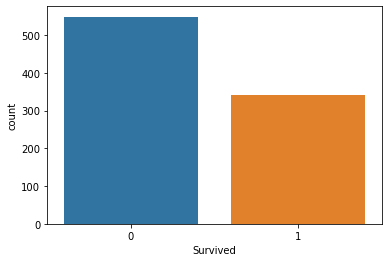

In [9]:
#Total number of people who survived or not 
sns.countplot(x="Survived", data=data);

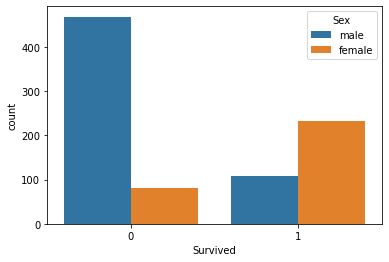

In [10]:
# Survival by sex
sns.countplot(x='Survived',hue='Sex', data=data);

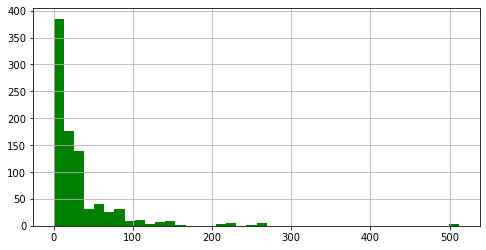

In [11]:
# Survival by sex
data['Fare'].hist(color='green',bins=40, figsize=(8,4));

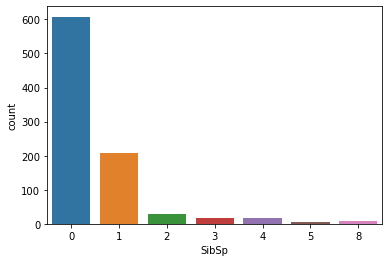

In [12]:
sns.countplot(x='SibSp',data=data);

In [13]:
#drop duplicate values 
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [14]:
# Encoding categorical columns
features=['Embarked','Sex']
data=pd.get_dummies(data,columns=features, drop_first=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [15]:
order = [1,2,3,4,5,6,7,0] # setting column's order
data = data[[data.columns[i] for i in order]]


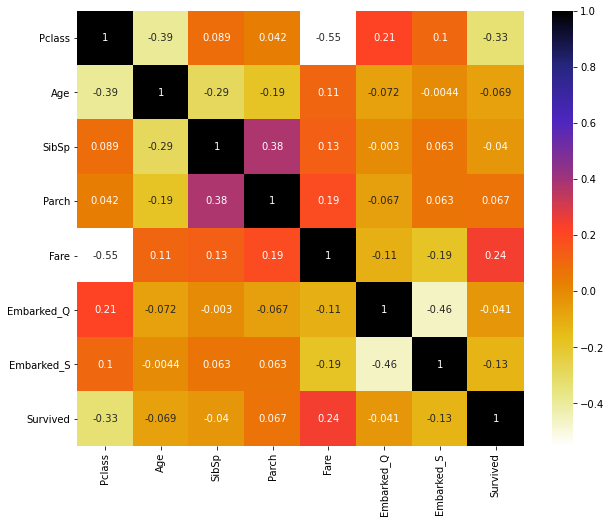

In [16]:
#using pearson corellation between numerical variables 
import seaborn as sns 
plt.figure(figsize=(10,8))
cor=data.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [17]:
X=data.iloc[:,:-1] ## independent features
y=data.iloc[:,-1] ## dependent features


In [18]:
import warnings
warnings.filterwarnings('ignore') 

In [19]:
scaler_x=MinMaxScaler()
X_scaled=scaler_x.fit(X)
X_scaled=scaler_x.transform(X)

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.25,random_state=42)

In [21]:
log=LogisticRegression( )
log.fit(X_train,y_train)

LogisticRegression()

In [22]:
#Evaluation matrix
ypred=log.predict(X_test)
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

[[88 23]
 [36 47]]
0.6958762886597938
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       111
           1       0.67      0.57      0.61        83

    accuracy                           0.70       194
   macro avg       0.69      0.68      0.68       194
weighted avg       0.69      0.70      0.69       194



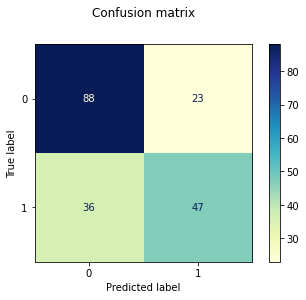

In [23]:
plot_confusion_matrix(log, X_test, y_test, values_format = '',cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1);

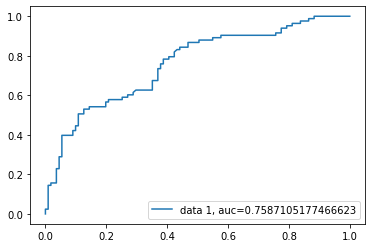

In [24]:
y_pred_proba = log.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [25]:
cl=RandomForestClassifier().fit(X_train,y_train)

ypred=cl.predict(X_test)
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

[[81 30]
 [35 48]]
0.6649484536082474
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       111
           1       0.62      0.58      0.60        83

    accuracy                           0.66       194
   macro avg       0.66      0.65      0.65       194
weighted avg       0.66      0.66      0.66       194



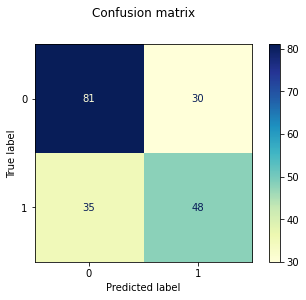

In [26]:
plot_confusion_matrix(cl, X_test, y_test, values_format = '',cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1);